<a href="https://colab.research.google.com/github/SatyaHarshithaDanda/Web-Scraping-On-Wikipedia/blob/main/Web_Scraping_On_Wikipedia_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Web Scraping With **Requests** & **BeautifulSoup**

<br>

We will pull data from [***wikipedia***](https://en.wikipedia.org/wiki/Artificial_intelligence) and then extract some specific data from the results

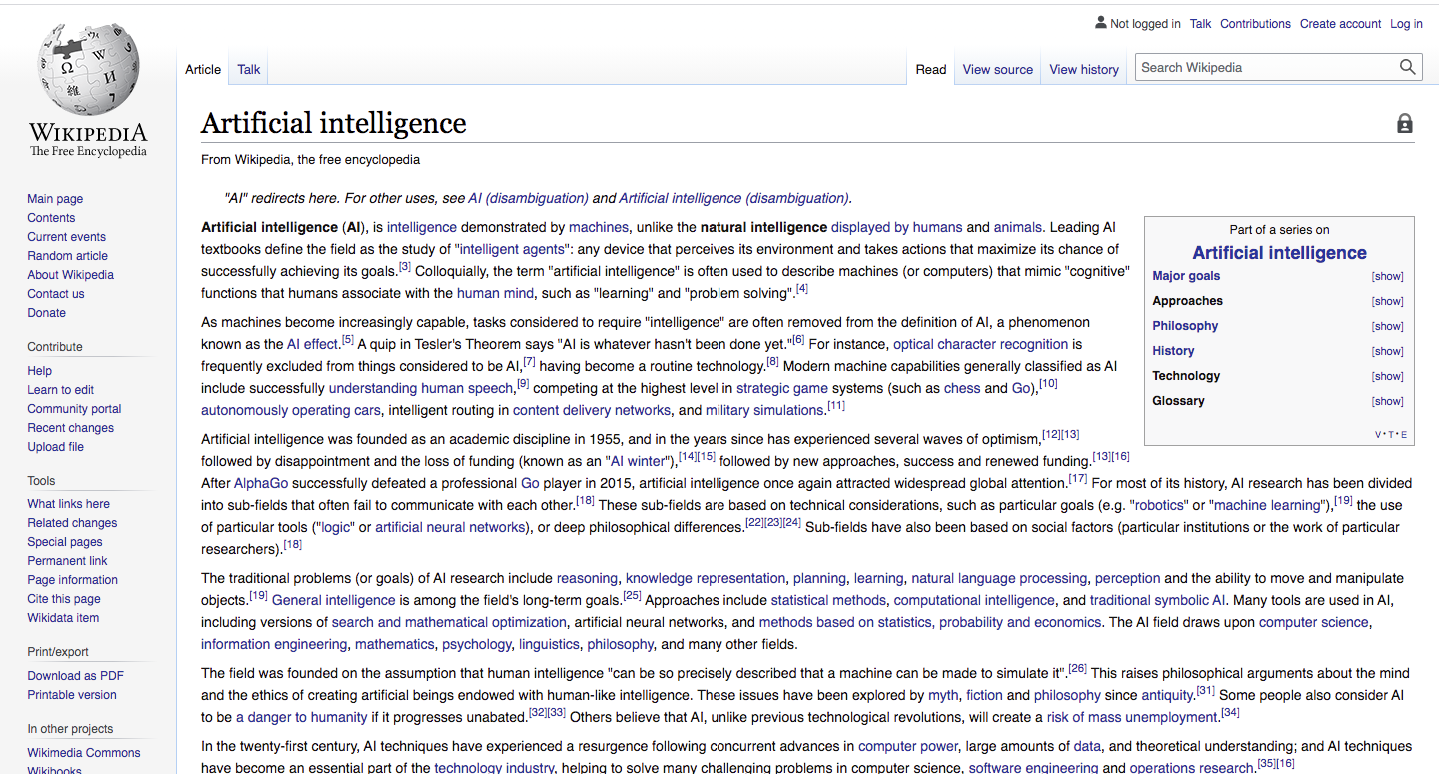

**Installation**

In [1]:
#uncomment the below code and run this cell to istall Beautiful soup
!pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=05d88de633ffd6180ad4c51df23699cbbceaa71e91f24348b335aef55e1aa831
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [2]:
!pip install requests

**Import the required libraries**

Beautiful Soup is normally referred to as **bs4** which stands for Beautiful Soup, version 4.

In [3]:
import requests #to make request to the required page
import bs4 #contains beautifulSoup for pulling data out of HTML and XML files
import pandas as pd #to convert our data to a dataframe

Let's specify where our data is going to come from and then use ***requests.get()*** to make an **HTTP** request to the page.

So let's say we want to get a data from ***wikipedia page*** about **Artificial Intelligence**.


In [4]:
ourdata=requests.get('https://en.wikipedia.org/wiki/Artificial_intelligence')

We can inspect what is inside **ourdata** by using ***ourdata.text***

In [5]:
ourdata.text #ourdata stores the information of the entire page, similar to viewing the source page of any website

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Artificial intelligence - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";var cookie=document.cookie.match(/(?:^|; )enwikimwclient


BeautifulSoup takes 2 parameters, your request variable and the second one is how you want to structure your data. e.g. html parser, lxml etc.
    
*Converting from object of type 'request to object of type beautiful soup'*

In [6]:
 bsp=bs4.BeautifulSoup(ourdata.text,'lxml')

let's see what is inside our variable **bsp**

In [8]:
#bsp #not expecting any changes, should be same as what is contained in ourdata, we just changed the type from requests to beautiful soup.

<br>

We can now do a lot of stuff with our beautifulsoup object

In [9]:
#get the tite of the page

titles=bsp.select('title')

In [10]:
titles

[<title>Artificial intelligence - Wikipedia</title>]

In [11]:
titles[0].getText() #use the getText() to extract the title

'Artificial intelligence - Wikipedia'

**Inspect the page to find which class contains the title headlines**

In [12]:
titles_class=bsp.select('.mw-headline') #extract the class that contains the title, NB: use '.' for selecting class names,'#' for selecting ID

In [13]:
titles_class

[<span class="mw-headline" id="Goals">Goals</span>,
 <span class="mw-headline" id="Reasoning,_problem-solving">Reasoning, problem-solving</span>,
 <span class="mw-headline" id="Knowledge_representation">Knowledge representation</span>,
 <span class="mw-headline" id="Planning_and_decision_making">Planning and decision making</span>,
 <span class="mw-headline" id="Learning">Learning</span>,
 <span class="mw-headline" id="Natural_language_processing">Natural language processing</span>,
 <span class="mw-headline" id="Perception">Perception</span>,
 <span class="mw-headline" id="Robotics">Robotics</span>,
 <span class="mw-headline" id="Social_intelligence">Social intelligence</span>,
 <span class="mw-headline" id="General_intelligence">General intelligence</span>,
 <span class="mw-headline" id="Tools">Tools</span>,
 <span class="mw-headline" id="Search_and_optimization">Search and optimization</span>,
 <span class="mw-headline" id="State_space_search">State space search</span>,
 <span class

### Select only the titles

In [14]:
 for i in titles_class:
    print(i.text) #to get only the text, NB: Find the difference between ".getText()" and ".text"

Goals
Reasoning, problem-solving
Knowledge representation
Planning and decision making
Learning
Natural language processing
Perception
Robotics
Social intelligence
General intelligence
Tools
Search and optimization
State space search
Local search
Logic
Probabilistic methods for uncertain reasoning
Classifiers and statistical learning methods
Artificial neural networks
Deep learning
Specialized hardware and software
Applications
Ethics
Risks and harm
Algorithmic bias
Lack of transparency
Bad actors and weaponized AI
Technological unemployment
Copyright
Ethical machines and alignment
Regulation
History
Philosophy
Defining artificial intelligence
Evaluating approaches to AI
Symbolic AI and its limits
Neat vs. scruffy
Soft vs. hard computing
Narrow vs. general AI
Machine consciousness, sentience and mind
Consciousness
Computationalism and functionalism
Robot rights
Future
Superintelligence and the singularity
Existential risk
Transhumanism
In fiction
See also
Explanatory notes
References
A

In [15]:
titles_class[10].getText() #we can find specific title using indexing

'Tools'

**We can as well use the span to acheive the same results**

In [16]:
titles_class1=bsp.select('h3 > span') #to select all the titles, can use any h tag, e.g. h2, h3, etc.

In [17]:
titles_class1

[<span id="Reasoning.2C_problem-solving"></span>,
 <span class="mw-headline" id="Reasoning,_problem-solving">Reasoning, problem-solving</span>,
 <span class="mw-headline" id="Knowledge_representation">Knowledge representation</span>,
 <span class="mw-headline" id="Planning_and_decision_making">Planning and decision making</span>,
 <span class="mw-headline" id="Learning">Learning</span>,
 <span class="mw-headline" id="Natural_language_processing">Natural language processing</span>,
 <span class="mw-headline" id="Perception">Perception</span>,
 <span class="mw-headline" id="Robotics">Robotics</span>,
 <span class="mw-headline" id="Social_intelligence">Social intelligence</span>,
 <span class="mw-headline" id="General_intelligence">General intelligence</span>,
 <span class="mw-headline" id="Search_and_optimization">Search and optimization</span>,
 <span class="mw-headline" id="Logic">Logic</span>,
 <span class="mw-headline" id="Probabilistic_methods_for_uncertain_reasoning">Probabilistic 

**We can also select the links**

In [18]:
links=bsp.select('link')

In [19]:
#links #check the links we have

In [21]:
#Alternatively, we can use find_all() to find all links
for link in bsp.find_all('link'):
     print(link)

<link href="/w/load.php?lang=en&amp;modules=codex-search-styles%7Cext.cite.styles%7Cext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cjquery.makeCollapsible.styles%7Cskins.vector.icons%2Cstyles%7Cwikibase.client.init&amp;only=styles&amp;skin=vector-2022" rel="stylesheet"/>
<link href="/w/load.php?lang=en&amp;modules=site.styles&amp;only=styles&amp;skin=vector-2022" rel="stylesheet"/>
<link href="//upload.wikimedia.org" rel="preconnect"/>
<link href="//en.m.wikipedia.org/wiki/Artificial_intelligence" media="only screen and (max-width: 720px)" rel="alternate"/>
<link href="/static/apple-touch/wikipedia.png" rel="apple-touch-icon"/>
<link href="/static/favicon/wikipedia.ico" rel="icon"/>
<link href="/w/opensearch_desc.php" rel="search" title="Wikipedia (en)" type="application/opensearchdescription+xml"/>
<link href="//en.wikipedia.org/w/api.php?action=rsd" rel="EditURI" type="application/rsd+xml"/>
<link href="https://en.wikipedia.org/wiki/Arti

let's see how we can get the images as well

In [22]:
imgs=bsp.select('img')

In [23]:
imgs

[<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>,
 <img alt="Wikipedia" class="mw-logo-wordmark" src="/static/images/mobile/copyright/wikipedia-wordmark-en.svg" style="width: 7.5em; height: 1.125em;"/>,
 <img alt="The Free Encyclopedia" class="mw-logo-tagline" height="13" src="/static/images/mobile/copyright/wikipedia-tagline-en.svg" style="width: 7.3125em; height: 0.8125em;" width="117"/>,
 <img alt="Page semi-protected" class="mw-file-element" data-file-height="512" data-file-width="512" decoding="async" height="20" src="//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/30px-Semi-protection-shackle.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/40px-Semi-protection-shackle.svg.png 2x" width="20"/>,
 <img class="mw-file-element" da

when analysing the webpage, you look for some kind of consistency so that you write a python code that loops through all the things


##**Alternatively**

We can also use the **wikipedia Python library** to achieve the same.

In [24]:
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=3de65423294c60d9776d4432779f08c629a78fd94b8f7a27e2bd84790f049b47
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [25]:
import wikipedia
from pprint import pprint #for better display of the output

In [26]:
#let's see how many pages are having Artificial_intelligence

wikipedia.search('Artificial intelligence')

['Artificial intelligence',
 'Generative artificial intelligence',
 'Artificial general intelligence',
 'A.I. Artificial Intelligence',
 'Hallucination (artificial intelligence)',
 'History of artificial intelligence',
 'Applications of artificial intelligence',
 'Artificial intelligence art',
 'Ethics of artificial intelligence',
 'Explainable artificial intelligence']

In [27]:
#let's search for the first page. i.e Artificial intelligence
ai=wikipedia.page(wikipedia.search('Artificial intelligence')[0])

In [28]:
#let's see the variuos functionalities or things we can do
dir(ai)

['_WikipediaPage__continued_query',
 '_WikipediaPage__load',
 '_WikipediaPage__title_query_param',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'categories',
 'content',
 'coordinates',
 'html',
 'images',
 'links',
 'original_title',
 'pageid',
 'parent_id',
 'references',
 'revision_id',
 'section',
 'sections',
 'summary',
 'title',
 'url']

In [29]:
#let's make use of some of the functions

pprint(ai.title)

'Artificial intelligence'


In [30]:
#get a summary of the page
pprint(ai.summary)

('Artificial intelligence (AI) is the intelligence of machines or software, as '
 'opposed to the intelligence of human beings or animals. AI applications '
 'include advanced web search engines (e.g., Google Search), recommendation '
 'systems (used by YouTube, Amazon, and Netflix), understanding human speech '
 '(such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or '
 'creative tools (ChatGPT and AI art), and competing at the highest level in '
 'strategic games (such as chess and Go).Artificial intelligence was founded '
 'as an academic discipline in 1956. The field went through multiple cycles of '
 'optimism followed by disappointment and loss of funding, but after 2012, '
 'when deep learning surpassed all previous AI techniques, there was a vast '
 'increase in funding and interest.\n'
 'The various sub-fields of AI research are centered around particular goals '
 'and the use of particular tools. The traditional goals of AI research '
 'include reasoning, kn

In [31]:
#get all the image links
pprint(ai.images)

['https://upload.wikimedia.org/wikipedia/commons/1/1c/Artificial_intelligence_prompt_completion_by_dalle_mini.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/e/e4/Artificial_neural_network.svg',
 'https://upload.wikimedia.org/wikipedia/commons/8/87/Capek_play.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/5/51/Computer_Retro.svg',
 'https://upload.wikimedia.org/wikipedia/commons/2/26/Deep_Learning.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif',
 'https://upload.wikimedia.org/wikipedia/commons/9/9e/GFO_taxonomy_tree.png',
 'https://upload.wikimedia.org/wikipedia/commons/4/41/Global_thinking.svg',
 'https://upload.wikimedia.org/wikipedia/commons/1/13/Joseph_Ayerle_portrait_of_Ornella_Muti_%28detail%29%2C_calculated_by_Artificial_Intelligence_%28AI%29_technology.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/b/b8/Kismet_robot_at_MIT_Museum.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Nuvola_apps_kal

In [32]:
#get entire content of the page
pprint(ai.content)

('Artificial intelligence (AI) is the intelligence of machines or software, as '
 'opposed to the intelligence of human beings or animals. AI applications '
 'include advanced web search engines (e.g., Google Search), recommendation '
 'systems (used by YouTube, Amazon, and Netflix), understanding human speech '
 '(such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or '
 'creative tools (ChatGPT and AI art), and competing at the highest level in '
 'strategic games (such as chess and Go).Artificial intelligence was founded '
 'as an academic discipline in 1956. The field went through multiple cycles of '
 'optimism followed by disappointment and loss of funding, but after 2012, '
 'when deep learning surpassed all previous AI techniques, there was a vast '
 'increase in funding and interest.\n'
 'The various sub-fields of AI research are centered around particular goals '
 'and the use of particular tools. The traditional goals of AI research '
 'include reasoning, kn